In [1]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [6]:
df1 = df.drop(columns = ['description', 'url', 'region_url'] )

In [7]:
df1.shape

(509577, 22)

In [8]:
df1.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
cylinders       199683
fuel              3985
odometer         92324
title_status      3062
transmission      3719
vin             207425
drive           144143
size            342003
type            141531
paint_color     164706
image_url           14
county          509577
state                0
lat              10292
long             10292
dtype: int64

In [9]:
df1.to_csv('vehicles_trimmed.csv')

In [74]:
df1 = pd.read_csv('vehicles_trimmed.csv')
df1

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,vin,drive,size,type,paint_color,image_url,county,state,lat,long
0,0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,...,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,NaN,ut,40.7372,-111.858
1,1,7034440610,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,NaN,ut,40.5881,-111.884
2,2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,...,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,NaN,ut,40.5881,-111.884
3,3,7034440546,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,NaN,ut,40.5881,-111.884
4,4,7034406932,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,...,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,509572,7034554007,salt lake city,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,...,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,NaN,ut,39.6405,-104.961
509573,509573,7034538385,salt lake city,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,...,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,NaN,ut,39.6405,-104.961
509574,509574,7034523643,salt lake city,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,...,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,NaN,ut,45.1637,-113.894
509575,509575,7034458858,salt lake city,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,...,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,NaN,ut,41.3112,-111.969


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [4]:
df1.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'county',
       'state', 'lat', 'long'],
      dtype='object')

In [ ]:
# Choose target
target = 'price'

In [ ]:
# Is your problem regression or classification?
# Regression, predicting a continuous variable with many levels

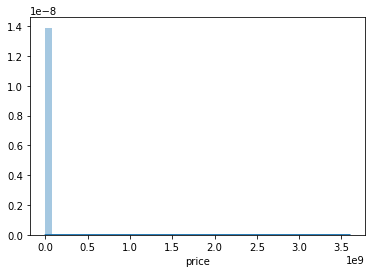

In [13]:
# Target distribution

sns.distplot(df1['price'])

In [33]:
print(np.median(df1['price']))
y.describe()
# Very right skewed but the 0s are holding it back even more. 
# Let's look at logs

9377.0


count    5.095770e+05
mean     5.479684e+04
std      9.575025e+06
min      0.000000e+00
25%      3.995000e+03
50%      9.377000e+03
75%      1.795500e+04
max      3.600029e+09
Name: price, dtype: float64

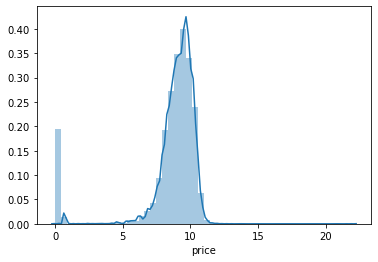

In [32]:
y = df1['price']
y_log = np.log1p(y)
sns.distplot(y_log)

In [63]:
# Chop out some outliers
df2 = df1[(df1['price'] >= np.percentile(df1['price'], 10)) &
          (df['price'] <= np.percentile(df1['price'], 99.95))]
df2['price'].describe()

count    458365.000000
mean      13816.970940
std       11358.103433
min         441.000000
25%        5499.000000
50%       10900.000000
75%       18995.000000
max      139500.000000
Name: price, dtype: float64

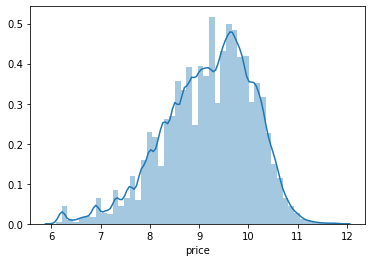

In [64]:
y = np.log1p(df2['price'])
sns.distplot(y)

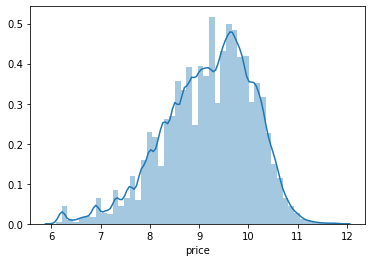

In [65]:
y = y.replace(0, np.NaN)
sns.distplot(y)
# Now it's left skewed

In [70]:
y.describe()

count    458365.000000
mean          9.186141
std           0.903067
min           6.091310
25%           8.612503
50%           9.296610
75%           9.851984
max          11.845827
Name: price, dtype: float64

In [69]:
np.e**9

8103.08392757538

In [ ]:
# Choose your evaluation metric(s).

# R^2 and perhaps MAE

In [73]:
#Choose which observations you will use to train, validate, and test your model.
train_orig, test = train_test_split(df2, test_size = 0.1, train_size = 0.9)
test

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,vin,drive,size,type,paint_color,image_url,county,state,lat,long
280768,7047681252,detroit metro,28500,2014.0,toyota,tundra,NaN,NaN,gas,NaN,...,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00b0b_2snkN7HRDG...,NaN,mi,42.2910,-83.4650
15775,7034177935,roanoke,4490,2013.0,mazda,2,excellent,4 cylinders,gas,112066.0,...,NaN,fwd,compact,wagon,red,https://images.craigslist.org/00q0q_cqURBr2YnQ...,NaN,va,37.2724,-79.9500
243601,7046193310,"kansas city, MO",6500,2014.0,ford,e350 super duty van,good,8 cylinders,gas,228084.0,...,NaN,rwd,NaN,truck,blue,https://images.craigslist.org/01212_zm9HuVpdTr...,NaN,ks,39.0417,-94.7202
436191,7037654030,erie,9995,2009.0,lexus,es,NaN,NaN,gas,131313.0,...,JTHBJ46G492277607,fwd,NaN,sedan,silver,https://images.craigslist.org/00404_pAbnNgZtTQ...,NaN,pa,41.5700,-81.5747
235828,7049574963,omaha / council bluffs,14985,2011.0,dodge,durango citadel,excellent,6 cylinders,gas,118000.0,...,1D4RE5GG5BC733917,4wd,full-size,SUV,brown,https://images.craigslist.org/00A0A_42VLFRu0fE...,NaN,ia,41.3719,-96.1527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247891,7033413535,wichita,8500,2014.0,chevrolet,traverse lt,excellent,6 cylinders,gas,156887.0,...,1GNKRGKD6EJ204916,fwd,NaN,SUV,red,https://images.craigslist.org/00606_8mEsfZiHUc...,NaN,ks,37.6142,-97.3341
15541,7037100520,roanoke,6900,2005.0,ford,f-150,excellent,NaN,gas,169000.0,...,1FTRX14W65BA57122,4wd,full-size,truck,black,https://images.craigslist.org/00F0F_4fFiMXbLlQ...,NaN,va,37.1331,-79.9556
3389,7037640894,vermont,15495,2016.0,subaru,crosstrek premium,excellent,4 cylinders,gas,49200.0,...,NaN,4wd,NaN,hatchback,silver,https://images.craigslist.org/00s0s_cywG01WXRe...,NaN,vt,42.7565,-72.5115
35257,7040195390,appleton-oshkosh-FDL,26900,2008.0,ford,super duty f-250 srw,excellent,8 cylinders,diesel,145811.0,...,1FTSW21R68ED40266,4wd,full-size,pickup,NaN,https://images.craigslist.org/00101_7QhcqofnKW...,NaN,wi,44.2273,-88.4679


In [75]:
train, val = train_test_split(train_orig, train_size = 0.9, test_size = 0.1)
train

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,vin,drive,size,type,paint_color,image_url,county,state,lat,long
127877,7037981321,ventura county,500,2000.0,honda,odyssey,fair,6 cylinders,gas,NaN,...,NaN,fwd,NaN,mini-van,NaN,https://images.craigslist.org/00G0G_2nMrzin8oB...,NaN,ca,34.1948,-118.8230
475838,7047294787,nashville,11995,2013.0,hyundai,elantra,like new,4 cylinders,gas,38707.0,...,KMHDH4AE5DU865780,fwd,NaN,sedan,red,https://images.craigslist.org/00W0W_eJzwuRu6i4...,NaN,tn,35.8716,-86.4170
416135,7049714178,bend,13500,2001.0,ram,NaN,NaN,NaN,diesel,175000.0,...,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00K0K_cdtwLIvBKP...,NaN,or,44.0928,-121.2940
260517,7044180978,maine,3995,2008.0,ford,taurus,good,6 cylinders,gas,122000.0,...,1FAHP24W98G152005,fwd,full-size,sedan,red,https://images.craigslist.org/00u0u_8SAC54T3Nr...,NaN,me,42.5959,-72.2267
269576,7046829752,cape cod / islands,18900,2012.0,ram,1500,NaN,NaN,gas,NaN,...,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00g0g_csnu7tcfp5...,NaN,ma,41.6601,-70.2967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97335,7047844040,monterey bay,12400,2016.0,mazda,cx5,good,4 cylinders,gas,69000.0,...,JM3KE2BY2G0724816,fwd,NaN,SUV,brown,https://images.craigslist.org/00I0I_dURx9LJWJr...,NaN,ca,37.0313,-122.1200
424224,7044044399,eugene,21988,2010.0,chevrolet,silverado 1500 ltz 4w,NaN,8 cylinders,gas,100499.0,...,3GCXKTE24AG271578,4wd,NaN,truck,NaN,https://images.craigslist.org/01414_iVQVdaD37o...,NaN,or,45.3860,-122.6080
5034,7049001401,fredericksburg,14995,2010.0,ford,f-150,NaN,NaN,other,94297.0,...,1FTFW1EV5AFD44893,4wd,NaN,pickup,grey,https://images.craigslist.org/00U0U_fgoJtWzrxg...,NaN,va,38.7594,-77.4542
329627,7049584803,eastern NC,16699,2018.0,nissan,rogue,NaN,NaN,gas,24194.0,...,JN8AT2MT9JW463642,fwd,NaN,NaN,white,https://images.craigslist.org/00y0y_cbMvXuayTH...,NaN,nc,35.4857,-78.2562


In [ ]:
#  Begin to clean and explore your data.
# - [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
# Question about what to do with price distribution: should I keep closing in the quartiles until the lower hump is left out?
# NaNs? Get rid of them?